In [1]:
import yfinance as yf
import mplfinance as mpf 
import pandas as pd

In [2]:
ticker_symbol = 'AAPL'
tick = yf.Ticker(ticker_symbol)

In [3]:
tick.info['shortName']

'Apple Inc.'

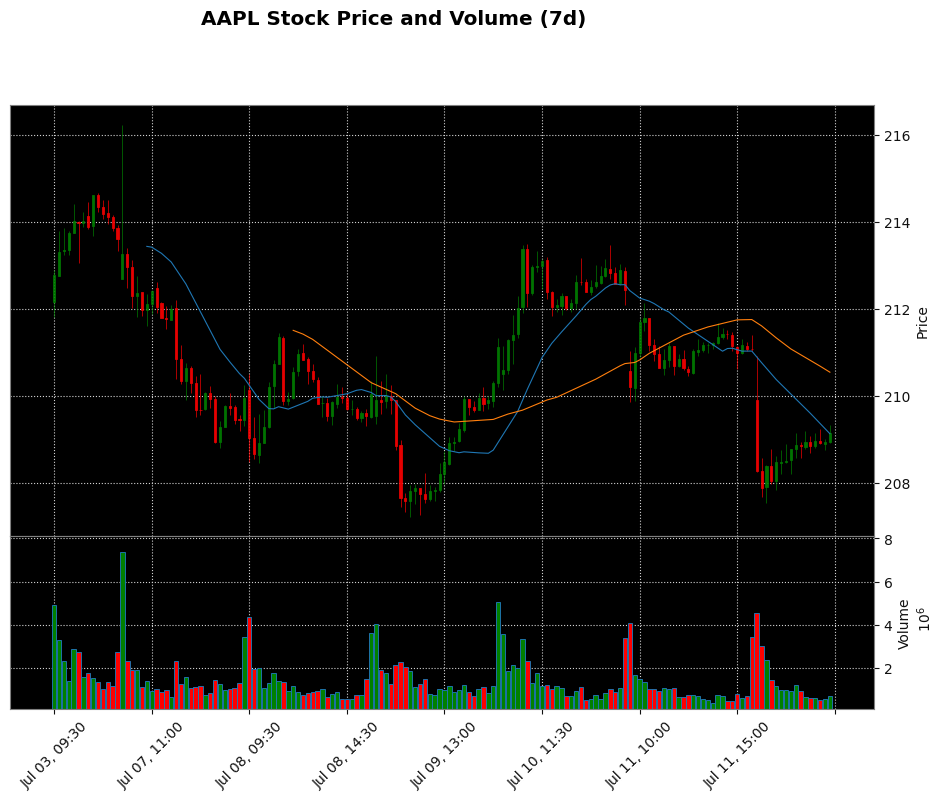

In [4]:

period = '7d'
hist = tick.history(period=period, interval='15m')

mc = mpf.make_marketcolors(
            up='green',        # Color for 'up' candles (close > open)
            down='red',          # Color for 'down' candles (close < open)
            edge='inherit',      # Candle borders inherit color from up/down
            wick='inherit',      # Candle wicks inherit color from up/down
            volume='in',         # Volume bars inherit color from corresponding candle
            ohlc='i'             # OHLC bars inherit color from corresponding candle
        )

s = mpf.make_mpf_style(
            base_mpf_style='yahoo', # Start with the 'yahoo' style as a base
            marketcolors=mc,        # Apply our custom market colors
            figcolor="#FFFFFF",     # Background color of the entire figure (light grey)
            facecolor="#000000",    # Background color of the plotting area (slightly lighter grey)
            gridcolor='lightgray',  # Color of the grid lines
            gridstyle=':',          # Style of the grid lines (dotted)
            rc={'axes.edgecolor': 'gray'} # Color of the border around the plot area
        )

fig,axlist = mpf.plot(
            hist,
            type='candle',          # Candlestick chart type
            mav=(20, 50),           # Add 20-day and 50-day Moving Averages
            volume=True,            # Display volume subplot
            style=s,                # Use our newly defined custom style
            title=f"{ticker_symbol} Stock Price and Volume ({period})",
            ylabel='Price',         # Y-axis label for the main price plot
            ylabel_lower='Volume',  # Y-axis label for the volume subplot
            figscale=1.5,
            returnfig = True           # Scale the figure size for better readability
            #y_on_right=False,       # Ensure y-axis labels and ticks are on the left
            # Save the plot to a file instead of displaying directly in some environments
            # savefig='yahoo_finance_plot.png'
        )

